<a href="https://colab.research.google.com/github/Erenkardogan/SmiLe/blob/main/FEED_FORWARD(SI%C4%9E_MODEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ilk olarak drive'i bagladik
from google.colab import drive
drive.mount('/content/drive')
#tüm fotolar 64*64 boyutunda burda

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [ ]:
# Veri yolları
positive_path = '/content/drive/MyDrive/datasetSm/SMILEs/positives/positives7'
negative_path = '/content/drive/MyDrive/datasetSm/SMILEs/negatives/negatives7'

# Veriyi yükleme ve ön işleme fonksiyonu
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = img.reshape(64, 64, 1)  # Gerekli şekle dönüştürme
            images.append(img)
            labels.append(label)
    return images, labels
# Pozitif ve negatif resimleri yükleyin
pos_images, pos_labels = load_images_from_folder(positive_path, 1)
neg_images, neg_labels = load_images_from_folder(negative_path, 0)

In [ ]:
# Veriyi birleştirin
images = np.array(pos_images + neg_images)
labels = np.array(pos_labels + neg_labels)

# Veriyi normalleştirin
images = images / 255.0

# Etiketleri one-hot encode yapın
labels = to_categorical(labels, num_classes=2)

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Veriyi düzleştirin (flatten)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# İleri beslemeli sinir ağını oluşturun
model = Sequential()
model.add(Dense(128, input_shape=(64*64,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Modeli derleyin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
H = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Test seti üzerinde tahmin yapın
predictions = model.predict(X_test)

Epoch 1/10
264/264 [==============================] - 4s 11ms/step - loss: 0.5270 - accuracy: 0.7545 - val_loss: 0.4080 - val_accuracy: 0.8401
Epoch 2/10
264/264 [==============================] - 3s 10ms/step - loss: 0.3951 - accuracy: 0.8198 - val_loss: 0.3775 - val_accuracy: 0.8296
Epoch 3/10
264/264 [==============================] - 4s 14ms/step - loss: 0.3978 - accuracy: 0.8202 - val_loss: 0.3573 - val_accuracy: 0.8481
Epoch 4/10
264/264 [==============================] - 3s 12ms/step - loss: 0.3623 - accuracy: 0.8419 - val_loss: 0.3560 - val_accuracy: 0.8576
Epoch 5/10
264/264 [==============================] - 2s 9ms/step - loss: 0.3792 - accuracy: 0.8315 - val_loss: 0.3598 - val_accuracy: 0.8510
Epoch 6/10
264/264 [==============================] - 2s 9ms/step - loss: 0.3597 - accuracy: 0.8437 - val_loss: 0.3430 - val_accuracy: 0.8524
Epoch 7/10
264/264 [==============================] - 2s 9ms/step - loss: 0.3573 - accuracy: 0.8437 - val_loss: 0.3373 - val_accuracy: 0.8571
Ep

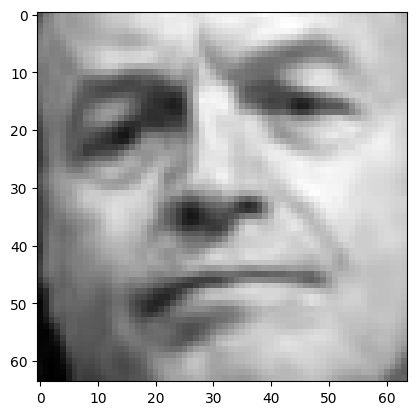

Görüntü boyutları (yükseklik, genişlik, kanal sayısı): (13165, 64, 64, 1)
guess:  0
%:  [73 27]


In [ ]:
# Görselleştirme
image_index = 40
image = (X_test[image_index].reshape(64, 64) * 255).astype(np.uint8)
plt.imshow(image, cmap='gray')  # 'gray' parametresi gri tonlamalı görüntüler içindir
plt.show()
print(f"Görüntü boyutları (yükseklik, genişlik, kanal sayısı): {images.shape}")

preds = predictions[30]
guess = np.argmax(preds)
perc = np.rint(preds * 100).astype(int)

print('guess: ', guess)
print('%: ', perc)

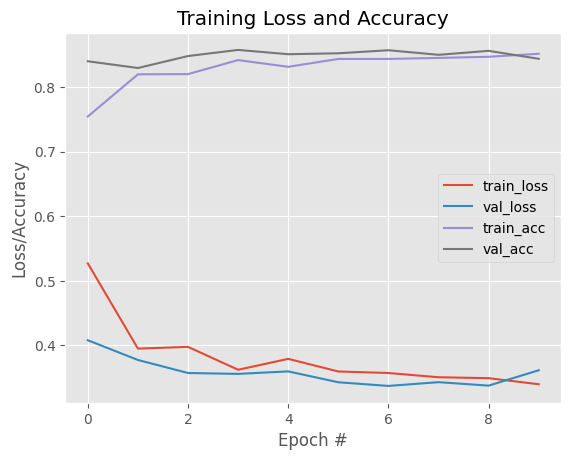

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()